## **<font color='#2F4F4F'>1. Defining the Question</font>**

### a) Specifying the Data Analysis Question

* What are the factors that contribute to the death of cancer patients?
* Using multiple linear regression modelling, predict the death rate of given set of cancer patients making sure to check for assumptions.

### b) Defining the Metric for Success

* Deterine at least one factor that contribute to the death of cancer patients.
* Successfully define a multiple regression model that will predict the death rate of cancer patients by upto 98% accuracy.

### c) Understanding the Context 

Background
The African Cancer Institute at Stellenbosch University aims to contribute to improving cancer prevention (both primary and secondary prevention, including screening), diagnosis and management in Africa. The institute is a coordinating and directive institution for research and training in the field of cancer within the University.

As a Data Scientist in the institution you are required to identify the factors that contribute to the death of cancer patients using the presented counties data as well as to build a multiple linear regression model to predict the death of cancer patients. 

### d) Recording the Experimental Design

1. Business Understanding : Understanding and assessing the business situation and goals. <br>

2. Data Understanding and Exploration 
  * Prerequisites
     * Load requisite libraries 
     * Load and preview datasets.
  * Data quality assessment (Accuracy, Completeness, Consistency, Currency, Relevance, Validity and Uniqueness).     
   <br>

3. Data Preparation and Analysis
  * Select the essential data relevant to the business problem).
  * Data cleaning
  * Data integration and formatting
  * Data transformation (merging datasets, reformatting fields, filtering records, ...) and enrichment (feature engineering)

4. Modeling
  * Modeling technique selection
  * Model building & assessment
  
5. Solution Implementation & Reporting
  * Summarize findings - Comparative study of regression algorithms.
  * Provide Recommendations
  * Challenge the solution.

## **<font color='#2F4F4F'>2. Data Understanding and Preparation.</font>**

### 2.1 Load requisite libraries

In [ ]:
# load requisite libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

### 2.2 Preview datasets

In [ ]:
# load and preview dataset(s)
# Dataset: https://bit.ly/3gJ5Jad 
# Dataset Glossary Download: https://bit.ly/3gYSst9 

cancer_df = pd.read_csv('https://bit.ly/3gJ5Jad')
cancer_df.sample(3)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
2877,249.0,90,176.6,519.0,53918,36671,11.9,0.000000,"(51046.4, 54545.6]",41.3,40.2,42.7,"Livingston County, Illinois",49.9,24.5,42.9,NaN,3.7,40.5,9.4,52.0,6.3,71.8,NaN,44.5,37.6,18.9,92.483218,5.420680,0.286556,0.854361,50.546184,7.034382
81,1214.0,406,158.6,479.1,54141,258718,12.0,1213.676667,"(51046.4, 54545.6]",36.8,35.7,37.9,"Brown County, Wisconsin",51.4,16.8,28.7,NaN,9.0,31.3,20.0,65.4,6.1,72.5,60.0,54.6,30.0,17.2,86.450453,2.359874,3.026496,2.879666,49.804253,5.921762
2377,109.0,43,195.5,512.9,55193,16247,10.9,0.000000,"(54545.6, 61494.5]",42.8,40.9,44.7,"De Witt County, Illinois",56.5,16.7,44.7,NaN,8.3,38.6,13.7,61.0,7.7,72.5,NaN,46.3,35.9,17.7,96.186234,0.500366,0.073224,1.122773,52.675439,8.025966


In [ ]:
# load glossary

# glossary = pd.read_csv('https://bit.ly/3gYSst9',header = None)
glossary = pd.read_csv('regression_project_glossary.csv')
glossary

,FieldName,DataType,Description
0,avganncount,decimal,Mean number of reported cases of cancer diagnosed annually (a)
1,avgdeathsperyear,integer,Mean number of reported mortalities due to cancer (a)
2,target_deathrate,decimal,Dependent variable. Mean per capita (100000) cancer mortalities (a)
3,incidencerate,decimal,Mean per capita (100000) cancer diagnoses (a)
4,medincome,integer,Median income per county (b)
5,popest2015,integer,Population of county (b)
6,povertypercent,decimal,Percent of populace in poverty (b)
7,studypercap,decimal,Per capita number of cancer-related clinical trials per county (a)
8,binnedinc,string,Median income per capita binned by decile (b)
9,medianage,decimal,Median age of county residents (b)


In [ ]:
# check the dimensions of the dataset

cancer_df.shape

(3047, 33)

In [ ]:
# preview variable datatypes

cancer_df.dtypes

avganncount                float64
avgdeathsperyear             int64
target_deathrate           float64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

### 2.3 Data quality assessment

In [ ]:
# Uniqueness quality check: See if we have any duplicated records in each of the datasets.

cancer_df.duplicated().sum()

0

In [ ]:
# Completeness quality check. Do we have null entries in the dataset?

cancer_df.isna().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

**The following variables have null entries:**
1. 2285 entries for pctsomecol18_24 : Percent of county residents ages 18-24 highest education attained: some college (b)
2. 152 entries for pctemployed16_over :  Percent of county residents ages 16 and over employed (b)
3. 609 values for pctprivatecoveragealone :  Percent of county residents with private health coverage alone (no public assistance) (b)


In [ ]:
# calculate the percentage of missing data for each variable

pctsomecol18_24 = (cancer_df['pctsomecol18_24'].isnull().sum() / len(cancer_df))*100
pctemployed16_over = (cancer_df['pctemployed16_over'].isnull().sum() /len(cancer_df)) *100
pctprivatecoveragealone = (cancer_df['pctprivatecoveragealone'].isnull().sum() /len(cancer_df))*100

print('Percentage of missing data values : \n')
print('pctsomecol18_24 : ', pctsomecol18_24)
print('pctemployed16_over : ',pctemployed16_over)
print('pctprivatecoveragealone : ',pctprivatecoveragealone)

Percentage of missing data values : 

pctsomecol18_24 :  74.9917952084017
pctemployed16_over :  4.98851329176239
pctprivatecoveragealone :  19.986872333442733


A rule of thumb is to drop any variable which has more than 5-10% of its data missing.

In [ ]:
# drop the variables exceeding this limit and impute the remaining ones with the median.

# drop nulls
cancer_df.drop(columns = ["pctsomecol18_24", "pctprivatecoveragealone"], axis=1, inplace = True)

In [ ]:
# compute the median of the column pctemployed16_over

median_value = cancer_df['pctemployed16_over'].median()
cancer_df['pctemployed16_over'].fillna(median_value, inplace = True)

# Confirm that there are no null entries in any of the rows
cancer_df.isna().sum()

avganncount               0
avgdeathsperyear          0
target_deathrate          0
incidencerate             0
medincome                 0
popest2015                0
povertypercent            0
studypercap               0
binnedinc                 0
medianage                 0
medianagemale             0
medianagefemale           0
geography                 0
percentmarried            0
pctnohs18_24              0
pcths18_24                0
pctbachdeg18_24           0
pcths25_over              0
pctbachdeg25_over         0
pctemployed16_over        0
pctunemployed16_over      0
pctprivatecoverage        0
pctempprivcoverage        0
pctpubliccoverage         0
pctpubliccoveragealone    0
pctwhite                  0
pctblack                  0
pctasian                  0
pctotherrace              0
pctmarriedhouseholds      0
birthrate                 0
dtype: int64

In [ ]:
# save the data set to a clean CSV file

cancer_df.to_csv('shaped_cancer.csv', index=False)

In [ ]:
# loading the clean dataset

shaped_cancer = pd.read_csv('shaped_cancer.csv')
shaped_cancer.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",52.5,11.5,39.5,6.9,23.2,19.6,51.9,8.0,75.1,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",44.5,6.1,22.4,7.5,26.0,22.7,55.9,7.8,70.2,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",54.2,24.0,36.6,9.5,29.0,16.0,45.9,7.0,63.7,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",52.7,20.2,41.2,2.5,31.6,9.3,48.3,12.1,58.4,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",57.8,14.9,43.0,2.0,33.4,15.0,48.2,4.8,61.6,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


## **<font color='#2F4F4F'>3. Data Analysis</font>**

### 3.1 Test for Multicollinearity

Since our dataset consists of largely numerical variables, we will look at the correlations between our variables so we can look at multicollinearity.

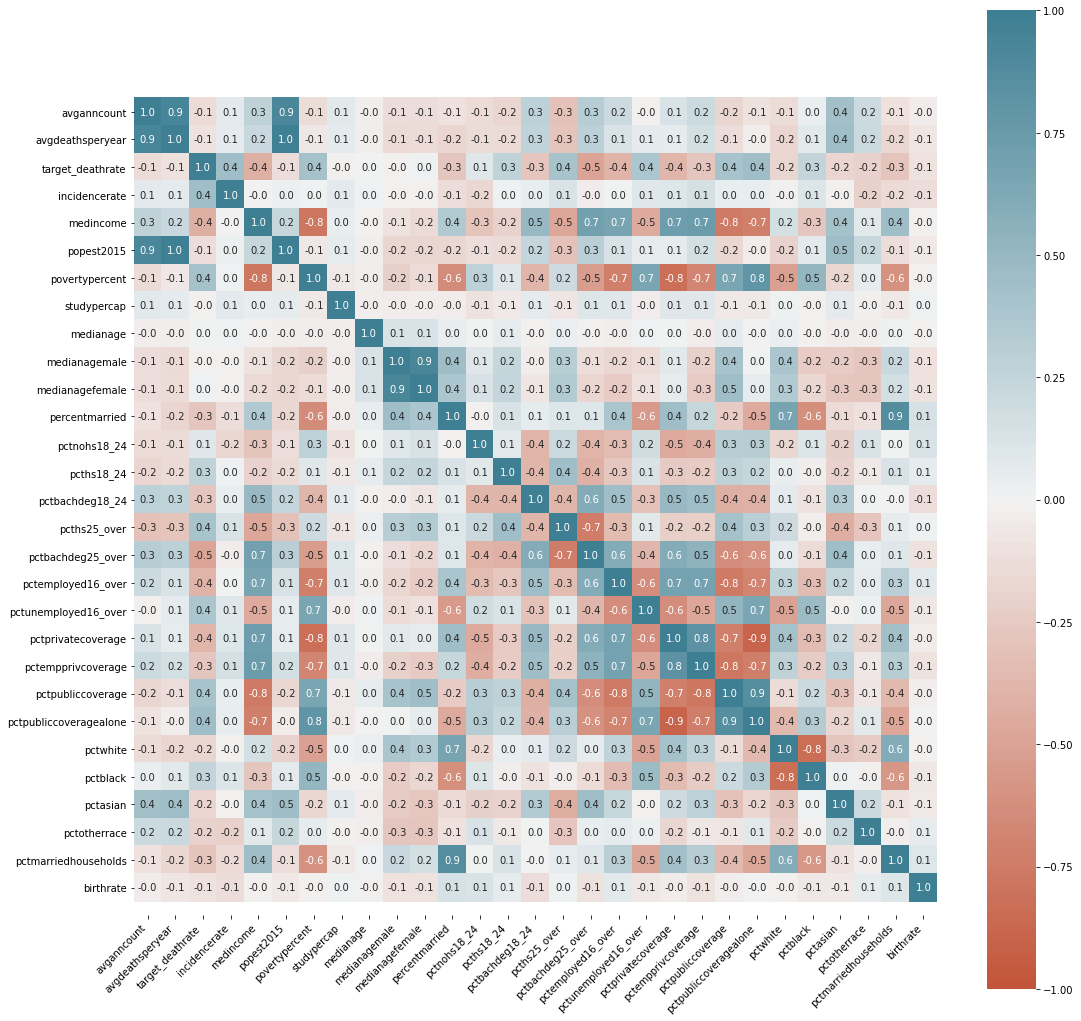

In [ ]:
# checking the correlations between the numerical variables
corr = shaped_cancer.corr()

# plotting the correlations onto a heatmap
plt.figure(figsize=(18, 18))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True,
    fmt='.1f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

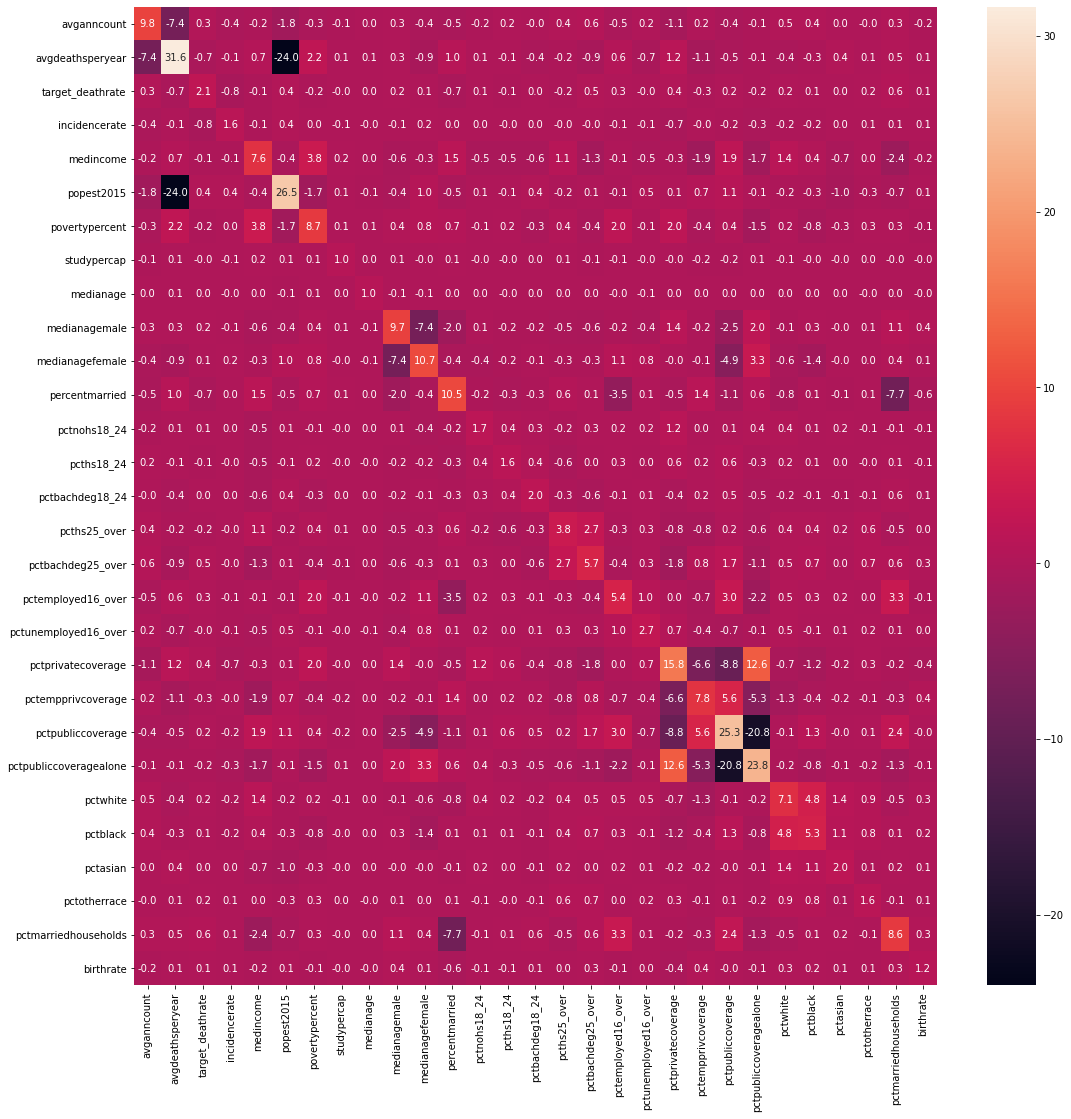

In [ ]:
# create a dataframe showing the Variance Inflation Factor (VIF) scores of the above correlations
vif = pd.DataFrame(np.linalg.inv(corr.values), columns = corr.columns, index = corr.index)

# plot the heatmap
plt.figure(figsize = (18, 18))
sns.heatmap(vif, annot = True, fmt='.1f')
plt.show()

A VIF score of 5 and higher indicates that that particular variable has relatively high multicollinearity with one or more variables in the dataset, and that variable needs to be removed to carry out regression. Since having little or no multicollinearity is one of the assumptions of linear regression, of which we will do multiple linear regression, we should create a dataset with little to no multicollinearity.

In [ ]:
# drop the variables with VIF scores higher than 5
shaped_cancer.drop(columns = ['avganncount', 'avgdeathsperyear', 'popest2015', 'povertypercent', 'medianagemale'], axis=1, inplace = True)
shaped_cancer.drop(columns = ['medianagefemale', 'percentmarried', 'pctbachdeg18_24', 'pctemployed16_over', 'pctprivatecoverage'], axis=1, inplace = True)
shaped_cancer.drop(columns = ['pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctmarriedhouseholds'], axis=1, inplace = True)

shaped_cancer.shape

(3047, 16)

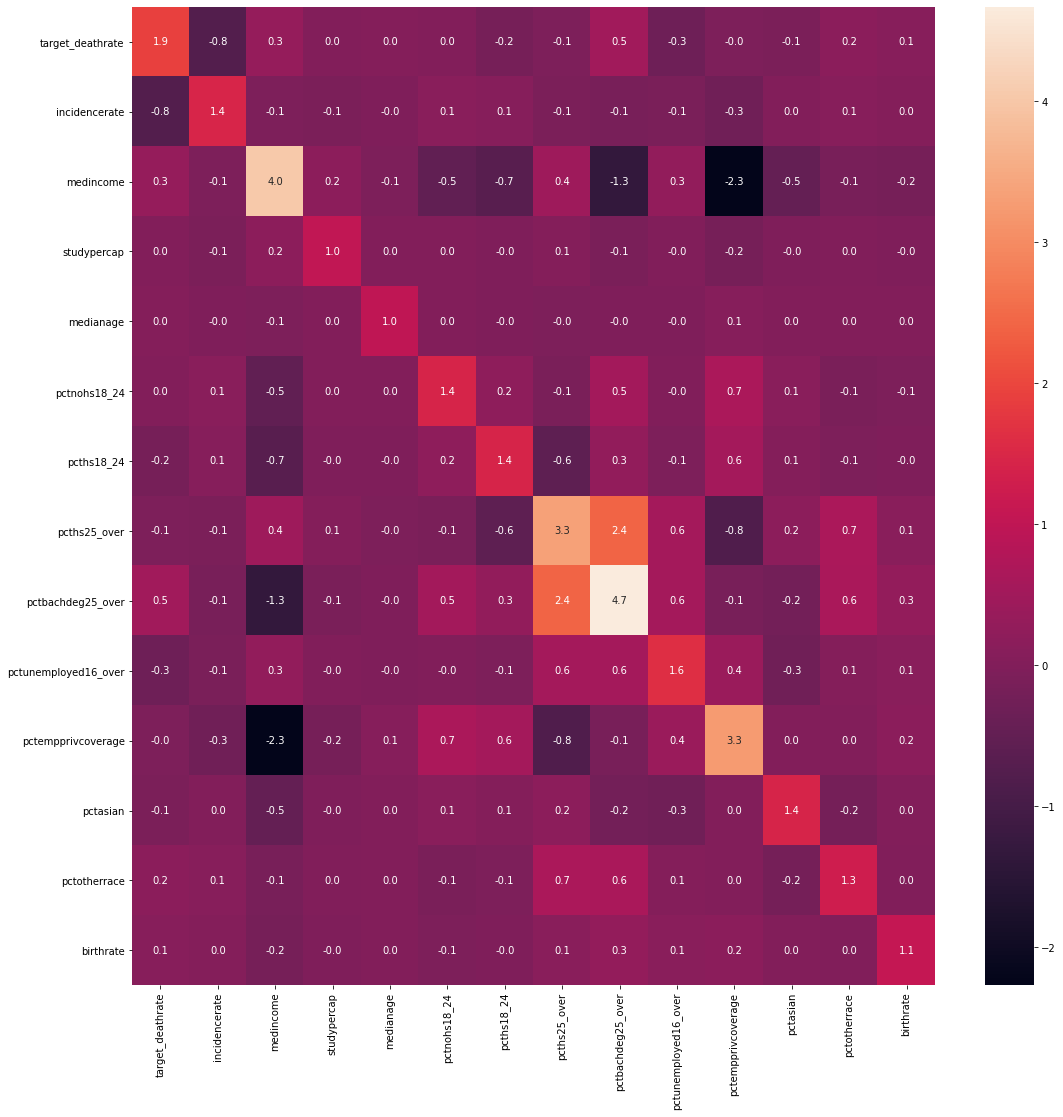

In [ ]:
# calculate the correlations of the new dataset
corr = shaped_cancer.corr()

# get the VIF Score
vif = pd.DataFrame(np.linalg.inv(corr.values), columns = corr.columns, index = corr.index)

# plot the heatmap
plt.figure(figsize = (18, 18))
sns.heatmap(vif, annot = True, fmt='.1f')
plt.show()

In [ ]:
# checking the data types
shaped_cancer.dtypes

target_deathrate        float64
incidencerate           float64
medincome                 int64
studypercap             float64
binnedinc                object
medianage               float64
geography                object
pctnohs18_24            float64
pcths18_24              float64
pcths25_over            float64
pctbachdeg25_over       float64
pctunemployed16_over    float64
pctempprivcoverage      float64
pctasian                float64
pctotherrace            float64
birthrate               float64
dtype: object

In [ ]:
# removing non-numerical variables
geog = shaped_cancer['geography']
binnedinc = shaped_cancer['binnedinc']

shaped_cancer.drop(columns=['geography', 'binnedinc'], inplace=True, axis=1)

*The initial dataset had 3047 rows and 33 columns, 2 of the columns were dropped as they violated the rule to maintain only columns with below 10% of null values. We later dropped all values with VIF of more than 5 to remain with a shape of 3047x16 and finally dropped the non numeric columns to remain with 3047 x 14 shape.*

## **<font color='#2F4F4F'>4. Data Modeling</font>**

In [ ]:
# dividing our dataset into features (X) and target (y)

X = shaped_cancer.iloc[:,1:15].values
y = shaped_cancer['target_deathrate'].values

print(X.shape)
print(y.shape)

(3047, 13)
(3047,)


In [ ]:
# splitting into train and test sets 80-20
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# importing Linear Regression function
from sklearn.linear_model import LinearRegression

# instantiating our regressor
regressor = LinearRegression()


In [ ]:
# fitting  regressor to training data

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# making predictions on the test set of our independent variables
y_pred = regressor.predict(X_test)

In [ ]:
# comparing the actual output values with the predicted values
compare = pd.DataFrame({
    'Actual' : y_test, 
    'Predicted' : y_pred
})

# previewing 10 samples
compare.sample(10)

,Actual,Predicted
170,176.1,187.706611
34,105.2,151.894095
261,194.3,192.943753
499,215.9,159.453387
124,143.2,153.417941
204,362.8,352.683959
37,140.8,155.047228
85,232.3,218.257106
111,212.1,188.757058
338,183.0,168.054031


In [ ]:
# evaluating model performance using Root Mean Squared Error (RMSE)
from sklearn import metrics 

print("Linear Regression RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Linear Regression R-squared Score:", metrics.r2_score(y_test, y_pred))

Linear Regression RMSE Score: 19.2816098596981
Linear Regression R-squared Score: 0.5287799463994718


In [ ]:
print("10% of target death rate mean:", cancer_df.target_deathrate.mean() * 0.1)

10% of target death rate mean: 17.866406301279973


*From the above we notice that the value of root mean squared error (RMSE) is 19.281, which is more than 10% of the mean value of the target death rate of 17.866
It therefore means that that the linear regression algorithm may not be very reliable to make reasonably good predictions.*

In [ ]:
print('R-squared:', metrics.r2_score(y_test, y_pred))

R-squared: 0.5287799463994718


*Coefficient of determination (R2 score) evaluates the performance of a linear regression model. In our case, 53% value implies that our model can only account for 53% changeability of the dependent output attribute and fails on 47%.*

### 4.1 Residual Plots & Heteroscedasticity

In [ ]:
# create residuals by substracting the test value from the predicted value for each row in our dataset
y_prime = np.subtract(y_pred, y_test)

# converting the residuals array into a dataframe and previewing summary stats.
pd.DataFrame(y_prime).describe()

,0
count,610.000000
mean,-0.095985
std,19.297195
min,-77.162955
25%,-11.215442
50%,0.582410
75%,12.839493
max,63.817769


We will plot our residuals on a scatter plot. If the points in the residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a nonlinear model is more appropriate.

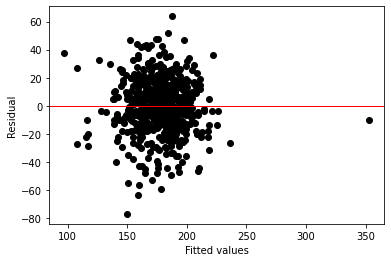

In [ ]:
# plotting our residuals
plt.scatter(y_pred, y_prime, color='black')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y = -8.619699e-16, color='red', linewidth = 1)
plt.show()

We see that a lot of values are scattered around the mean while a fairly large amount are spread further apart from the mean, meaning that there are no obvious patterns. We will however go ahead and perform a test for heteroscedasticity to be certain. We will use Bartlett's Test to test the null hypothesis that the variances in this dataset are homogeneous (equal).

In [ ]:
import scipy as sp

# using the scipy bartlett function to get our test result and p-value
# (test establishes as a null hypothesis that the variance is equal for all our 
#  datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.)

test_result, p_value = sp.stats.bartlett(y_pred, y_prime)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

# computing the critical value of a chi-squared distribution
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# print the critical value
print("Critical value:", critical_value)

Critical value: 626.8349141795613


If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.

In [ ]:
if (test_result > critical_value):
    print(" The variances are heterogeneous (unequal), and the model needs to be reassessed.")
else:
    print('The variances are homogeneous (equal) i.e. we can identify no patterns, and we accept the null hypothesis that the variance is homogeneous across our data')

The variances are homogeneous (equal) i.e. we can identify no patterns, and we accept the null hypothesis that the variance is homogeneous across our data


## **<font color='#2F4F4F'>5. Summary of Findings</font>**

The cancer dataset met most of the assumptions for multiple linear regression such as linearity, normality and homoscedasticity (uniform noise across all features), non-multicollinearity (features independence). However, the model could only account for 53% of prediction hence not quite adequate for the Cancer Institute.

## **<font color='#2F4F4F'>6. Recommendations</font>**

Given the prediction rate, my recommendation would be to try our other models for this learning.

**Acknowledgements:**
* **Project Source : https://bit.ly/2U2QlM4** The [dataset provided](https://bit.ly/3gJ5Jad) was aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov.
* Many thanks to [AfterWork Data Science](https://afterwork.ai/) Fellowship for the opportunity to train and exercise on this dataset.